# Algoritmo K-MODES

In [22]:
# Importar librerias necesarias
import pandas as pd
import pandas
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

## Lectura y tratamiento de la base de datos 

In [23]:
#Importar base de datos y mostrar información
BDEg=pandas.read_csv(r"C:\Users\Fer_P\OneDrive\Documentos\Repositorio Github\ProgramaKmodes\BDEg.csv",sep=";",header=0)
BDEg.info()
BDEg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Titulación                67 non-null     object 
 1   Tiempo transcurrido       67 non-null     int64  
 2   Posgrado                  67 non-null     object 
 3   Estado                    67 non-null     object 
 4   Tipo                      66 non-null     object 
 5   Puesto actual             67 non-null     object 
 6   Puesto inicial            67 non-null     object 
 7   Horario                   66 non-null     object 
 8   Contrato                  67 non-null     object 
 9   Ingreso mensual           67 non-null     int64  
 10  Actividades               67 non-null     int64  
 11  Tiempo trancurrido_1      67 non-null     int64  
 12  Factores de contratación  66 non-null     float64
 13  Calidad Formación         67 non-null     int64  
 14  Carencias   

,Titulación,Tiempo transcurrido,Posgrado,Estado,Tipo,Puesto actual,Puesto inicial,Horario,Contrato,Ingreso mensual,...,Carencias 2,Instalaciones,Servicios,Equipos,Limpieza,Infraestructura,Docentes,Técnicas,Evaluaciones,Deseo de posgrado
0,No titulado,6,No,Oaxaca,Privada,Diseño,Diseño,Horas,Honorarios,2,...,Si,2,2,2,1,2.0,2,2,2,Si
1,CENEVAL,5,No,Oaxaca,Privada,Técnico,Técnico,Horas,Indeterminado,1,...,No,1,2,2,1,1.0,2,1,2,Si
2,CENEVAL,5,No,Oaxaca,Pública,Programador,Programador,Completo,Eventual,3,...,Si,2,2,2,1,2.0,3,2,3,No
3,CENEVAL,5,No,Monterrey,Privada,Ing. Proyectos,Técnico,Completo,Indeterminado,4,...,No,1,2,4,1,2.0,1,2,2,No
4,CENEVAL,5,No,Desempleo,Desempleo,Desempleo,Desempleo,Desempleo,Desempleo,0,...,Si,3,2,3,1,3.0,3,2,2,No


In [24]:
## Mostrar categorías de la base de datos
BDEg_categ = BDEg.columns
BDEg_categ

Index(['Titulación', 'Tiempo transcurrido', 'Posgrado', 'Estado', 'Tipo',
       'Puesto actual', 'Puesto inicial', 'Horario', 'Contrato',
       'Ingreso mensual', 'Actividades', 'Tiempo trancurrido_1',
       'Factores de contratación', 'Calidad Formación', 'Carencias',
       'Carencias 2', 'Instalaciones', 'Servicios', 'Equipos', 'Limpieza',
       'Infraestructura', 'Docentes', 'Técnicas', 'Evaluaciones',
       'Deseo de posgrado'],
      dtype='object')

In [25]:
#Copia de la base de datos
BDEg_cust = BDEg[['Titulación', 'Tiempo transcurrido', 'Posgrado', 'Estado', 'Tipo',
       'Puesto actual', 'Puesto inicial', 'Horario', 'Contrato',
       'Ingreso mensual', 'Actividades', 'Tiempo trancurrido_1',
       'Factores de contratación', 'Calidad Formación', 'Carencias',
       'Carencias 2', 'Instalaciones', 'Servicios', 'Equipos', 'Limpieza',
       'Infraestructura', 'Docentes', 'Técnicas', 'Evaluaciones',
       'Deseo de posgrado']]
BDEg_cust.head()

,Titulación,Tiempo transcurrido,Posgrado,Estado,Tipo,Puesto actual,Puesto inicial,Horario,Contrato,Ingreso mensual,...,Carencias 2,Instalaciones,Servicios,Equipos,Limpieza,Infraestructura,Docentes,Técnicas,Evaluaciones,Deseo de posgrado
0,No titulado,6,No,Oaxaca,Privada,Diseño,Diseño,Horas,Honorarios,2,...,Si,2,2,2,1,2.0,2,2,2,Si
1,CENEVAL,5,No,Oaxaca,Privada,Técnico,Técnico,Horas,Indeterminado,1,...,No,1,2,2,1,1.0,2,1,2,Si
2,CENEVAL,5,No,Oaxaca,Pública,Programador,Programador,Completo,Eventual,3,...,Si,2,2,2,1,2.0,3,2,3,No
3,CENEVAL,5,No,Monterrey,Privada,Ing. Proyectos,Técnico,Completo,Indeterminado,4,...,No,1,2,4,1,2.0,1,2,2,No
4,CENEVAL,5,No,Desempleo,Desempleo,Desempleo,Desempleo,Desempleo,Desempleo,0,...,Si,3,2,3,1,3.0,3,2,2,No


In [26]:
#Estadísticas de la base de datos
BDEg_cust.describe() 

,Tiempo transcurrido,Ingreso mensual,Actividades,Tiempo trancurrido_1,Factores de contratación,Calidad Formación,Instalaciones,Servicios,Equipos,Limpieza,Infraestructura,Docentes,Técnicas,Evaluaciones
count,67.000000,67.000000,67.000000,67.000000,66.000000,67.000000,67.000000,67.000000,67.000000,67.000000,66.000000,67.000000,67.000000,67.000000
mean,4.477612,1.970149,0.776119,2.149254,2.212121,1.746269,1.985075,1.731343,2.104478,1.507463,1.833333,2.164179,2.044776,2.074627
std,2.414340,1.507257,0.623307,1.597856,2.317261,0.990000,0.878920,1.067170,1.338637,0.704383,1.117460,0.863345,1.236231,1.363078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
50%,5.000000,2.000000,1.000000,1.000000,1.500000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,6.000000,3.000000,1.000000,4.000000,3.000000,2.500000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
max,7.000000,4.000000,3.000000,5.000000,7.000000,3.000000,4.000000,4.000000,5.000000,3.000000,4.000000,3.000000,4.000000,5.000000


In [27]:
#Verificando que no existan valores nulos
BDEg_cust.isnull().sum()*100/BDEg_cust.shape[0]

Titulación                  0.000000
Tiempo transcurrido         0.000000
Posgrado                    0.000000
Estado                      0.000000
Tipo                        1.492537
Puesto actual               0.000000
Puesto inicial              0.000000
Horario                     1.492537
Contrato                    0.000000
Ingreso mensual             0.000000
Actividades                 0.000000
Tiempo trancurrido_1        0.000000
Factores de contratación    1.492537
Calidad Formación           0.000000
Carencias                   0.000000
Carencias 2                 0.000000
Instalaciones               0.000000
Servicios                   0.000000
Equipos                     0.000000
Limpieza                    0.000000
Infraestructura             1.492537
Docentes                    0.000000
Técnicas                    0.000000
Evaluaciones                0.000000
Deseo de posgrado           0.000000
dtype: float64

In [28]:
### Eliminar datos nulos
BDEg_cust=BDEg_cust.dropna()

#Verificando que se han borrado los valores nulos
BDEg_cust.isnull().sum()*100/BDEg_cust.shape[0]

Titulación                  0.0
Tiempo transcurrido         0.0
Posgrado                    0.0
Estado                      0.0
Tipo                        0.0
Puesto actual               0.0
Puesto inicial              0.0
Horario                     0.0
Contrato                    0.0
Ingreso mensual             0.0
Actividades                 0.0
Tiempo trancurrido_1        0.0
Factores de contratación    0.0
Calidad Formación           0.0
Carencias                   0.0
Carencias 2                 0.0
Instalaciones               0.0
Servicios                   0.0
Equipos                     0.0
Limpieza                    0.0
Infraestructura             0.0
Docentes                    0.0
Técnicas                    0.0
Evaluaciones                0.0
Deseo de posgrado           0.0
dtype: float64

In [29]:
##Mostrar información de la base de datos sin valores nulos
BDEg_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 66
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Titulación                65 non-null     object 
 1   Tiempo transcurrido       65 non-null     int64  
 2   Posgrado                  65 non-null     object 
 3   Estado                    65 non-null     object 
 4   Tipo                      65 non-null     object 
 5   Puesto actual             65 non-null     object 
 6   Puesto inicial            65 non-null     object 
 7   Horario                   65 non-null     object 
 8   Contrato                  65 non-null     object 
 9   Ingreso mensual           65 non-null     int64  
 10  Actividades               65 non-null     int64  
 11  Tiempo trancurrido_1      65 non-null     int64  
 12  Factores de contratación  65 non-null     float64
 13  Calidad Formación         65 non-null     int64  
 14  Carencias   

## Aplicación del algoritmo K-MODES

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 865.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 740.0
Run 1, iteration: 2/100, moves: 13, cost: 711.0
Run 1, iteration: 3/100, moves: 0, cost: 711.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 616.0
Run 1, iteration: 2/100, moves: 3, cost: 614.0
Run 1, iteration: 3/100, moves: 1, cost: 614.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25, cost: 553.0
Run 1, iteration: 2/100, moves: 8, cost: 549.0
Run 1, iteration: 3/100, moves: 1, cost: 549.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17, cost: 526.0
Run 1, iteration: 2/100, moves: 5, cost: 521.0
Run 1, iteration: 3/100, moves: 

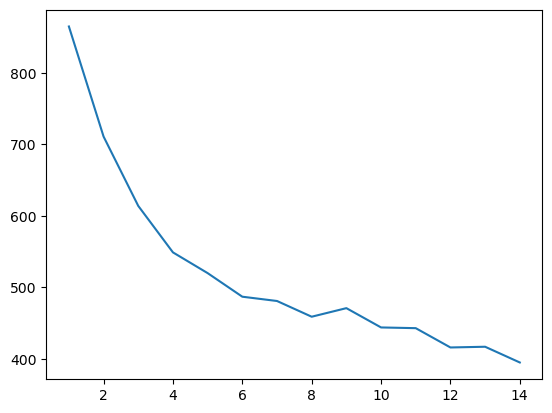

In [30]:
## Codo de jambú para seleccionar el número de clusters óptimo
## el parámetro init de la función K modes puede tener los valores "Cao", "Huang" o "Random"
cost = []
for num_clusters in list(range(1,15)):
    kmode = KModes(n_clusters = num_clusters, init = "Huang", n_init = 1, verbose = 1)
    kmode.fit_predict(BDEg_cust)
    cost.append(kmode.cost_)

y = np.array([i for i in range(1,15,1)])
plt.plot(y,cost)

In [31]:
#Copia de la base de datos
BDEg_cust_copy = BDEg_cust.copy()

In [32]:
# K-Modes
kmode = KModes(n_clusters=5, init = "cao", n_init = 1, verbose=1)
clusteres = kmode.fit_predict(BDEg_cust)
#Centroides
centroides=pd.DataFrame(kmode.cluster_centroids_)
centroides.columns=BDEg_cust.columns
centroides.to_csv('Modas.csv')
BDEg_cust.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 540.0
Run 1, iteration: 2/100, moves: 0, cost: 540.0


,Titulación,Tiempo transcurrido,Posgrado,Estado,Tipo,Puesto actual,Puesto inicial,Horario,Contrato,Ingreso mensual,...,Carencias 2,Instalaciones,Servicios,Equipos,Limpieza,Infraestructura,Docentes,Técnicas,Evaluaciones,Deseo de posgrado
0,No titulado,6,No,Oaxaca,Privada,Diseño,Diseño,Horas,Honorarios,2,...,Si,2,2,2,1,2.0,2,2,2,Si
1,CENEVAL,5,No,Oaxaca,Privada,Técnico,Técnico,Horas,Indeterminado,1,...,No,1,2,2,1,1.0,2,1,2,Si
2,CENEVAL,5,No,Oaxaca,Pública,Programador,Programador,Completo,Eventual,3,...,Si,2,2,2,1,2.0,3,2,3,No
3,CENEVAL,5,No,Monterrey,Privada,Ing. Proyectos,Técnico,Completo,Indeterminado,4,...,No,1,2,4,1,2.0,1,2,2,No
4,CENEVAL,5,No,Desempleo,Desempleo,Desempleo,Desempleo,Desempleo,Desempleo,0,...,Si,3,2,3,1,3.0,3,2,2,No


In [33]:
### Agregar columna con el número de cluster al que pertenece cada elemento
BDEg_cust_copy.insert(0, "Cluster", clusteres, allow_duplicates=True)
BDEg_cust_copy=BDEg_cust_copy.sort_values('Cluster')
BDEg_cust_copy.to_csv('BDEgClust.csv')
BDEg_cust_copy.head()

,Cluster,Titulación,Tiempo transcurrido,Posgrado,Estado,Tipo,Puesto actual,Puesto inicial,Horario,Contrato,...,Carencias 2,Instalaciones,Servicios,Equipos,Limpieza,Infraestructura,Docentes,Técnicas,Evaluaciones,Deseo de posgrado
0,0,No titulado,6,No,Oaxaca,Privada,Diseño,Diseño,Horas,Honorarios,...,Si,2,2,2,1,2.0,2,2,2,Si
58,0,CENEVAL,7,No,Oaxaca,Propia,Puesto administrativo,Puesto administrativo,Completo,Indeterminado,...,Si,2,2,3,2,1.0,2,2,2,No
57,0,No titulado,0,No,Oaxaca,Publica,Profesor,Desempleo,Completo,Indeterminado,...,No,2,2,2,2,2.0,2,2,0,No
55,0,No titulado,7,No,Querétaro,Privada,Practicante,Practicante,Completo,Indeterminado,...,Si,3,2,3,1,3.0,3,3,2,No
50,0,No titulado,7,No,Oaxaca,Propia,Puesto administrativo,Desempleo,Horas,Indeterminado,...,No,2,2,2,2,2.0,2,2,2,No


In [34]:
## Número de elementos de cada cluster
unique, counts = np.unique(clusteres, return_counts=True)
EC=dict(zip(unique, counts))
EC1=[]
for i in range(0,5):
    EC1.append(0)

## Resultados
### Numero de elementos de cada cluster 

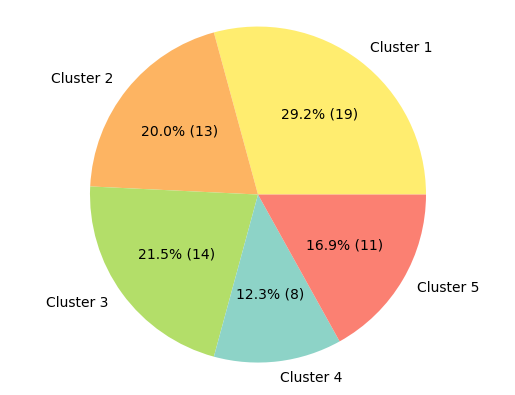

In [35]:
### Gráfico pastel de la cantidad de elementos de cada cluster
for i in range(0,5):
    EC1[i]=EC[i]    
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}% ({next(gen)})"

nombres = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5"]
normdata = colors.Normalize(min(EC1), max(EC1))
colormap = cm.get_cmap("Set3")
colores =colormap(normdata(EC1))

plt.pie(EC1, labels=nombres, autopct=autopct_fun(EC1),colors=colores)
plt.axis("equal")
plt.show()

### Gráficas de barras por categoria

<AxesSubplot: xlabel='Titulación', ylabel='count'>

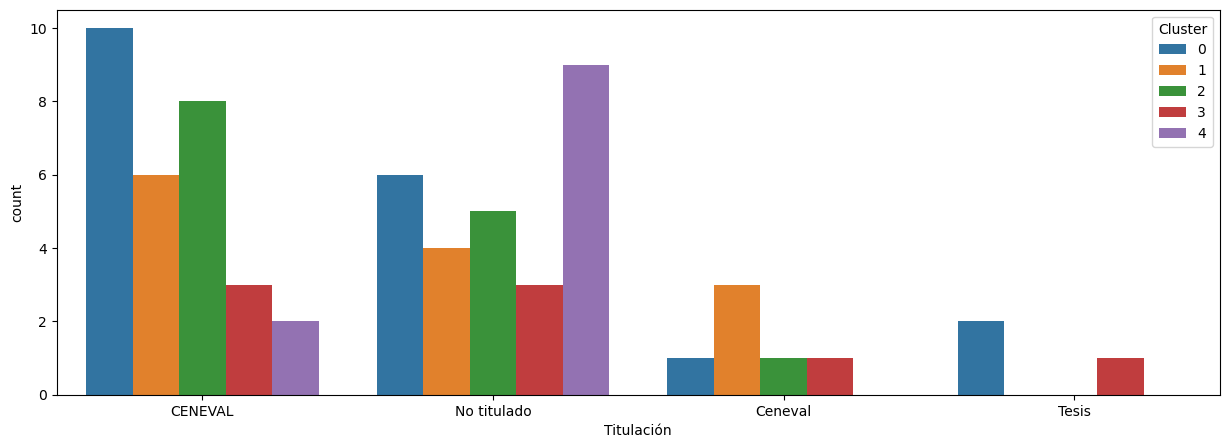

In [36]:
plt.subplots(figsize = (15,5))
sns.countplot(x=BDEg_cust_copy['Titulación'],order=BDEg_cust_copy['Titulación'].value_counts().index,hue=BDEg_cust_copy['Cluster'])

<AxesSubplot: xlabel='Tiempo transcurrido', ylabel='count'>

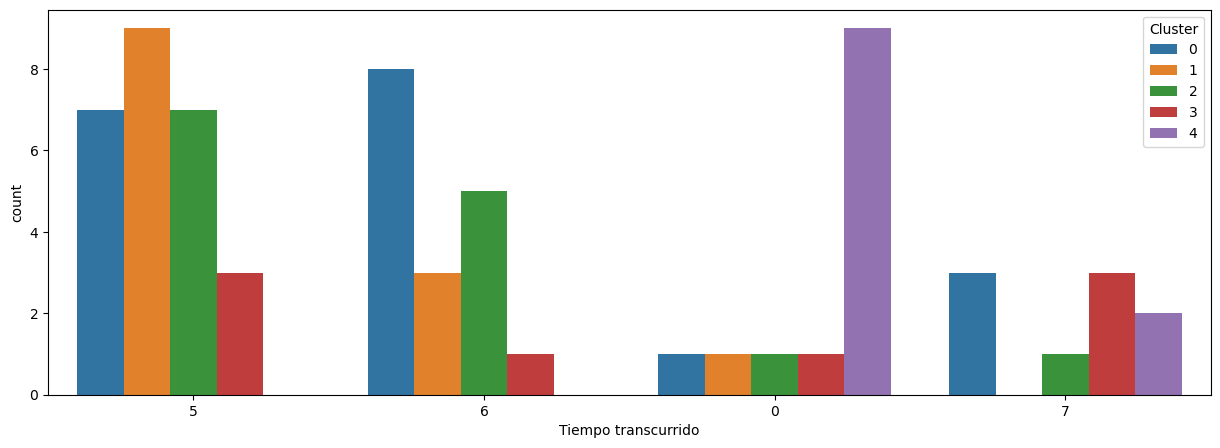

In [37]:
plt.subplots(figsize = (15,5))
sns.countplot(x=BDEg_cust_copy['Tiempo transcurrido'],order=BDEg_cust_copy['Tiempo transcurrido'].value_counts().index,hue=BDEg_cust_copy['Cluster'])

<AxesSubplot: xlabel='Posgrado', ylabel='count'>

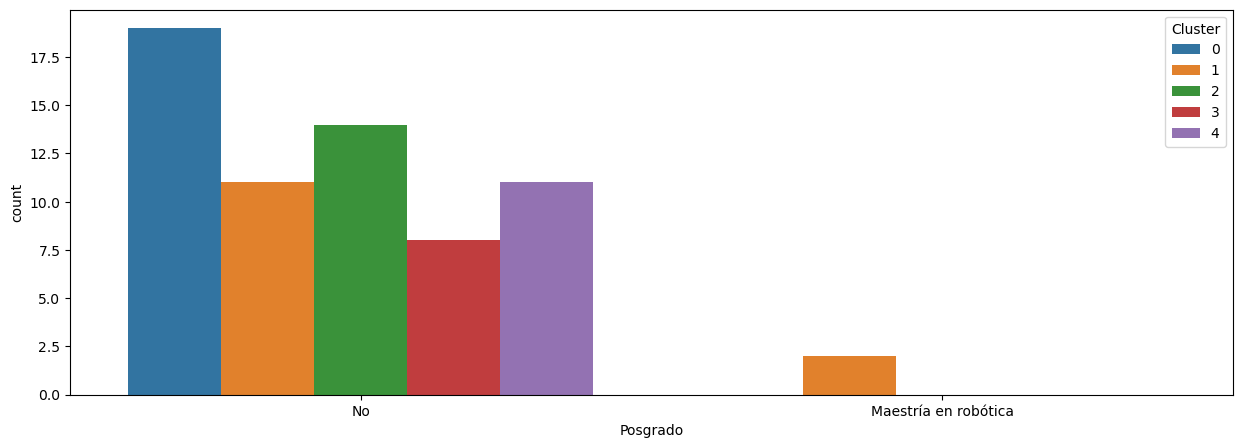

In [38]:
plt.subplots(figsize = (15,5))
sns.countplot(x=BDEg_cust_copy['Posgrado'],order=BDEg_cust_copy['Posgrado'].value_counts().index,hue=BDEg_cust_copy['Cluster'])

<AxesSubplot: xlabel='Estado', ylabel='count'>

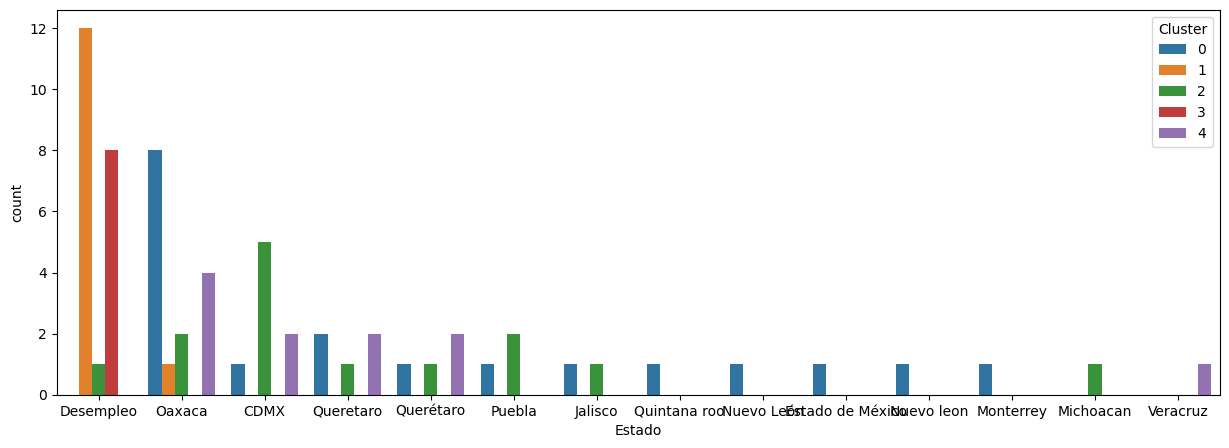

In [39]:
plt.subplots(figsize = (15,5))
sns.countplot(x=BDEg_cust_copy['Estado'],order=BDEg_cust_copy['Estado'].value_counts().index,hue=BDEg_cust_copy['Cluster'])

<AxesSubplot: xlabel='Tipo', ylabel='count'>

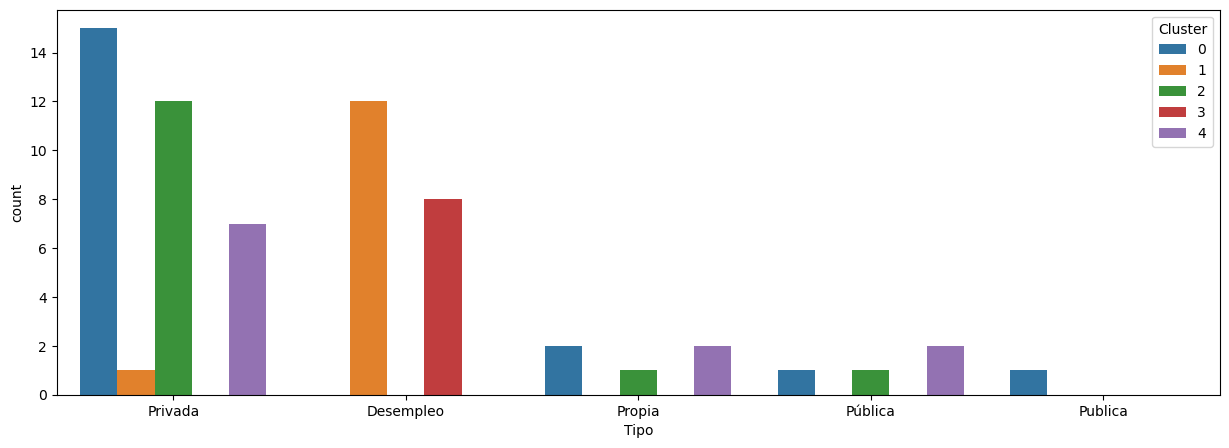

In [40]:
plt.subplots(figsize = (15,5))
sns.countplot(x=BDEg_cust_copy['Tipo'],order=BDEg_cust_copy['Tipo'].value_counts().index,hue=BDEg_cust_copy['Cluster'])

<AxesSubplot: xlabel='Puesto actual', ylabel='count'>

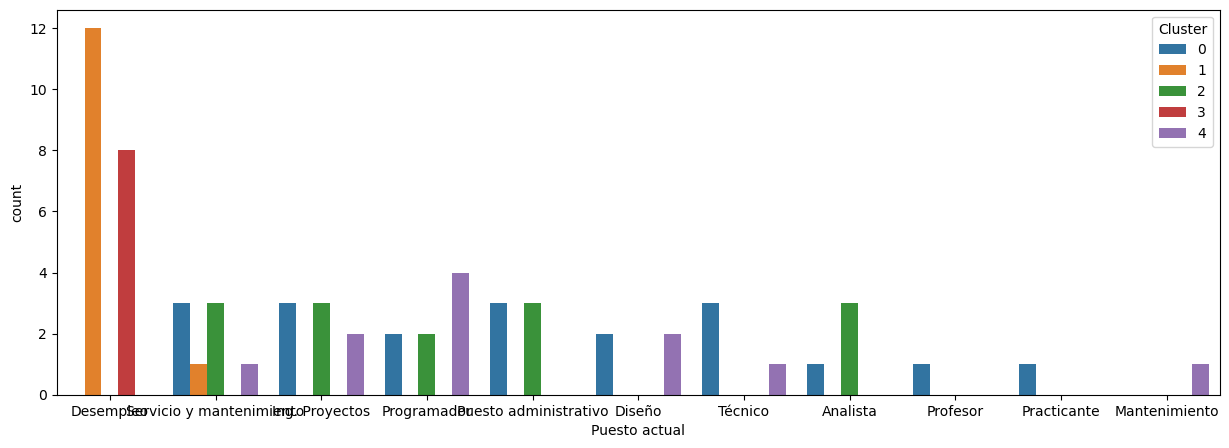

In [41]:
plt.subplots(figsize = (15,5))
sns.countplot(x=BDEg_cust_copy['Puesto actual'],order=BDEg_cust_copy['Puesto actual'].value_counts().index,hue=BDEg_cust_copy['Cluster'])